<a href="https://colab.research.google.com/github/HumzaW245/GraphNN-Project/blob/main/HumzaWajid_MAT6495_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT 6495: Spectral Graph Theory (Fall 2024), Problem Set II
### Name: Humza Wajid Hameed

# Graph signal processing with the Stanford bunny graph

Please follow the instructions and provide your code in the designated space. You will obtain a personal copy of the notebook by clicking `Copy to Drive`. Once you are done, submit your final notebook with all plots, results, and code, that you can obtain by `File > Download > Download .ipynb`.

In this notebook we are going to use the PyGSP library to carry out some graph signal processing tasks.

In [14]:
!pip install pygsp
!pip install scipy==1.8
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Import libraries
import numpy as np
import pygsp
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Stanford bunny graph

We are going to use the Stanford bunny graph as the graph on which we carry out our signal processing. The Stanford bunny is in fact a manifold in the shape of a bunny. It is embedded into $\mathbb{R}^3$, so every point on the manifold is a vector in $\mathbb{R}^3$. The bunny graph is obtained by taking approximately 2500 random samples from the manifold (uniformly distributed), and then creating a nearest neighbor graph from these samples. In the case of the bunny graph, for each vertex $a \in \mathbb{R}^3$ sampled from the bunny, all vertices $b \neq a$ with $\| a - b \| < \epsilon$ are placed in the neighborhood, $N(a)$, of $a$. `PyGSP` selects $\epsilon = 0.2$. The edges in the graph are given weights in proportion to $\| a - b \|^{-1}$.

In this next cell, let us load the bunny graph and display (i) its nearest neighbor graph adjacency matrix; and (ii) the three-dimensional points sampled from the bunny. Note: you might get a warning, but you can ignore it.

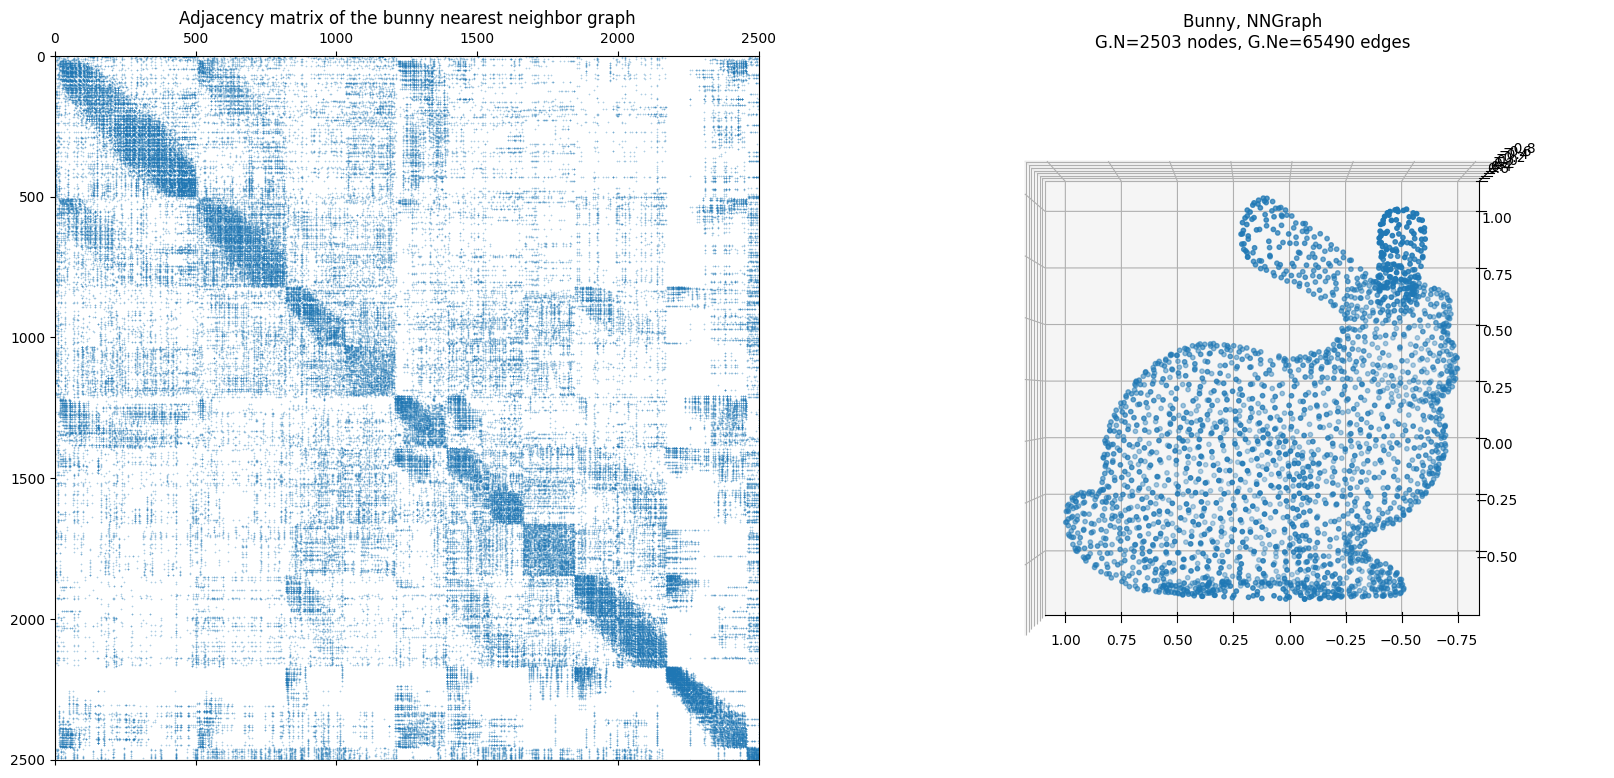

In [16]:
# Load the bunny graph
G = pygsp.graphs.Bunny()

# Plot the adjacency matrix and the samples of the bunny manifold
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax1.spy(G.W, markersize=0.1)
ax1.set_title('Adjacency matrix of the bunny nearest neighbor graph')
G.plot(ax=ax2)

## Graph Laplacian
We can use PyGSP to compute the graph Laplacian of the bunny graph. You could also use your own code from the earlier homework exercises, but PyGSP handles sparse graphs automatically and given the number of vertices in the bunny graph, it is probably advisable to use the built in PyGSP functionality for computations. So let us do that now.

In [17]:
# Compute the graph Laplacian. We can access it with G.L once we run this line
G.compute_laplacian()

## Graph Fourier basis
We can also use PyGSP to compute the eigenvectors and eigenvalues of the graph Laplacian. Since we are doing graph signal processing, PyGSP interprets the eigenvectors as the Fourier basis of the graph (as we are currently interpreting them in class), and hence refers to this computation as computing the Fourier basis of the graph. This next cell will do the job for us.

In [18]:
# Compute the Fourier basis of the graph
G.compute_fourier_basis()

We can access the eigenvectors and eigenvalues of the graph Laplacian with the following commands. G.U for the eigenvectors, in which each column is an eigenvector, and G.e for the eigenvalues. The command G.lmax will return the maximum eigenvalue. Let us start by plotting the eigenvalues.

**Task 1: In the next cell, make a plot of the eigenvalues in which the  𝑥 -axis is the eigenvalue index and the  𝑦 -axis is the eigenvalue. Note, the eigenvalues are already sorted in ascending order. You should get an "S" type curve (i.e., a few small eigenvalues, a lot of medium sized eigenvalues, and a few large eigenvalues).**

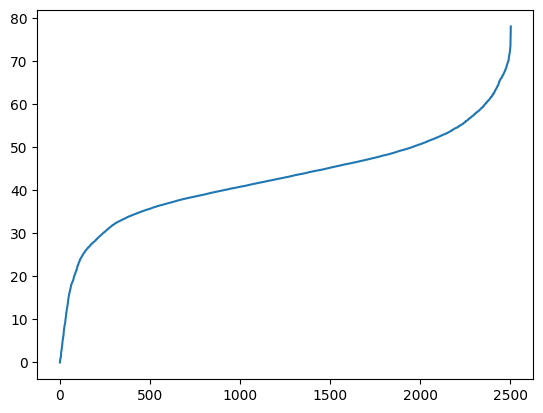

In [19]:
# TODO: PLOT THE EIGENVALUES HERE
evals = G.e
plt.plot(evals)
plt.show()


Now, let us plot a few of the eigenvectors on the bunny manifold. In particular, we are going to plot $\psi_2$, $\psi_3$, $\psi_4$, and $\psi_5$.

**Task 2: Plot the first four non-trivial eigenvectors of the graph Laplacian overlayed on the bunny manifold. You can use the function `G.plot_signal(signal, **kwargs)` to make the plots, and set `signal = G.U[:,k-1]` for the $k^{\text{th}}$ eigenvector. See also the code above that plots the bunny. You should get a similar plot, but in which the vertices of the bunny are colored according to the value of the eigenvector at each vertex. Documentation for `G.plot_signal` can be found here: https://pygsp.readthedocs.io/en/v0.5.1/reference/graphs.html#pygsp.graphs.Graph.plot_signal**

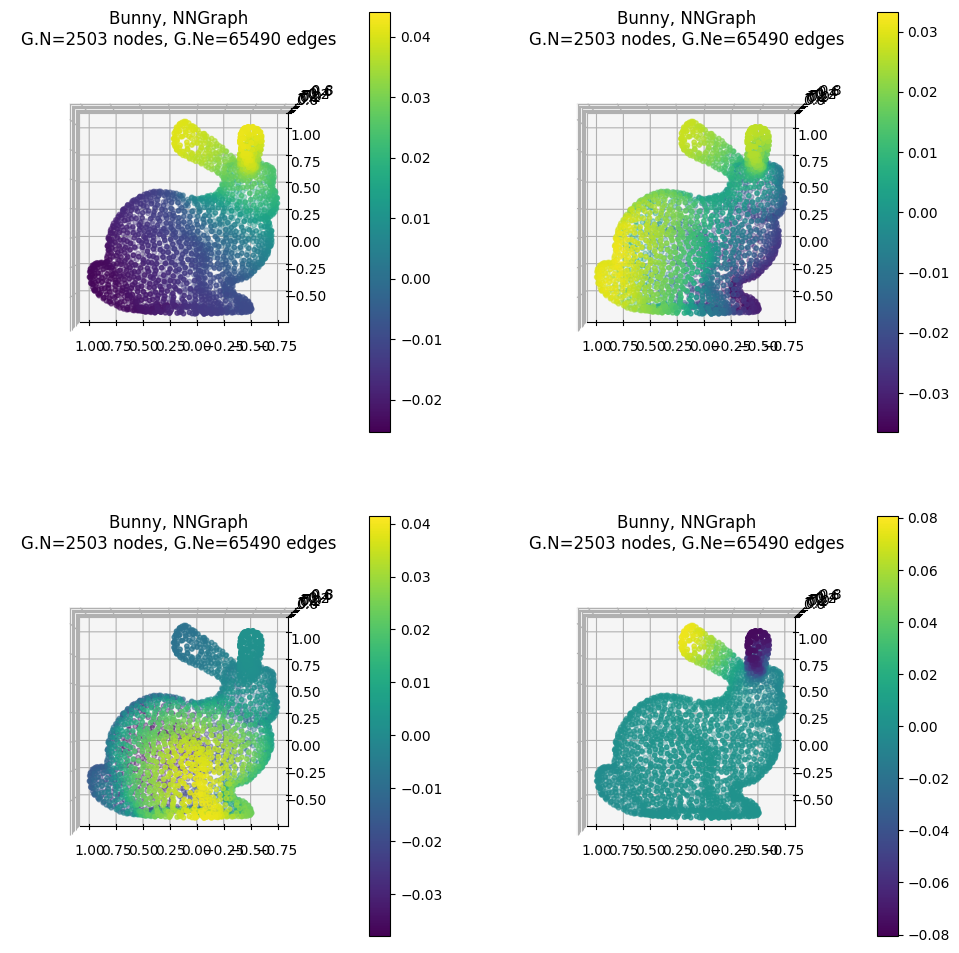

In [20]:
# TODO: PLOT THE FIRST FOUR NON-TRIVIAL EIGENVECTORS ON THE BUNNY MANIFOLD HERE
# Assuming G is your graph object and G.U contains the eigenvectors
# Plot the first four non-trivial eigenvectors



fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection':'3d'})
axes = axes.flatten()

 # k 1 to 4 because 0 is trivial one.
for k in range(1, 5):
    #which axes to plot on the signal
    ax = axes[k-1]
    #plot_signal
    G.plot_signal(G.U[:, k], ax=ax)

plt.show()


You should see the second eigenvector, $\psi_2$, is negative on one part of the bunny and positive on another part of the bunny, and in particular, that $G(W_2)$ (the Fiedler nodal domain associated to $\psi_2$) will have one connected component. More precisely, the bunny ears should have one sign, and the bunny tail should have the opposite sign. For $\psi_3$ you should see that it is positive (negative) on both the bunny tail and the bunny ears, and is negative (postive) on part of the bunny in between these regions. These oscillatory patterns for $\psi_2$ and $\psi_3$ mostly mimic our intuition from the path graph and standard Fourier analysis. Now take a look at $\psi_5$. It is positive on one bunny ear, negative on the other bunny ear, and nearly zero on the remainder of the bunny! This type of eigenvector localization is unique to non-path, non-cycle graphs, and does not mimic the oscillatory patterns we see in standard Fourier analysis. Indeed, the harmonics in Euclidean Fourier analysis are $\sin (\omega t)$ and $\cos (\omega t)$, which have no localization whatsoever.  

## Graph filters

Now let us make a graph low pass filter on the bunny. A low pass filter is a graph filter that is concentrated in the low frequencies (eigenvalues) of the graph. Define this filter $h_{\mathrm{low}}$ in frequency as:
\begin{equation*}
\hat{h}_{\mathrm{low}} (k) := \left( 1 - \frac{\lambda_k}{\lambda_n} \right)^m \, .
\end{equation*}
Recall that this filter can be defined on the vertices of the graph via
\begin{equation*}
h_{\mathrm{low}} = \sum_{k=1}^n \hat{h}_{\mathrm{low}}(k) \psi_k = \Psi \hat{h}_{\mathrm{low}} \, .
\end{equation*}

**Task 3: For $m=10$, (a) Plot $\hat{h}_{\mathrm{low}}$ as a function of the eigenvalue $\lambda_k$ (not the index $k$). Then, using $\hat{h}_{\mathrm{low}}$, (b) compute the filter $h_{\mathrm{low}} : V \rightarrow \mathbb{R}$ and plot the filter on the bunny manifold using the `G.plot_signal` function. You should get a plot of the bunny (like the one above), but in which the vertices are colored according to the values of the filter $h_{\mathrm{low}}$.**

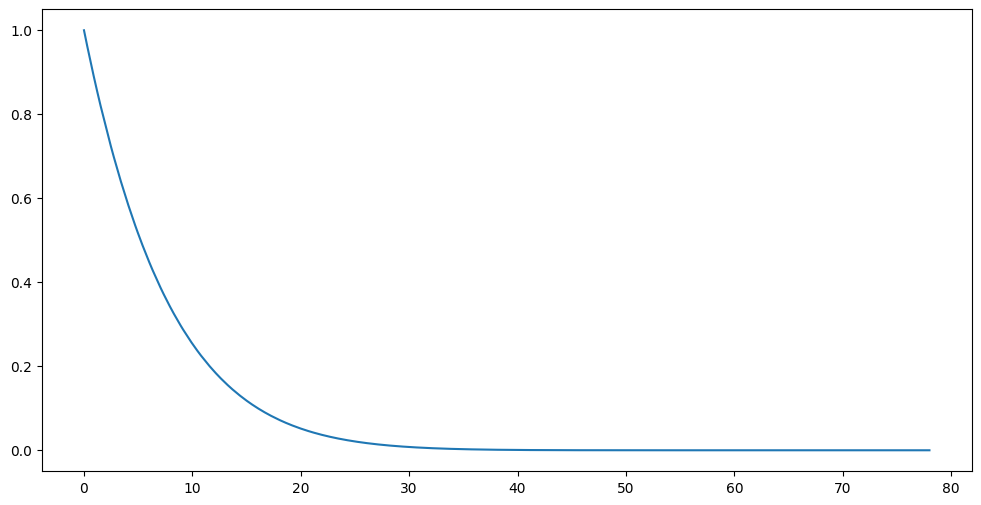

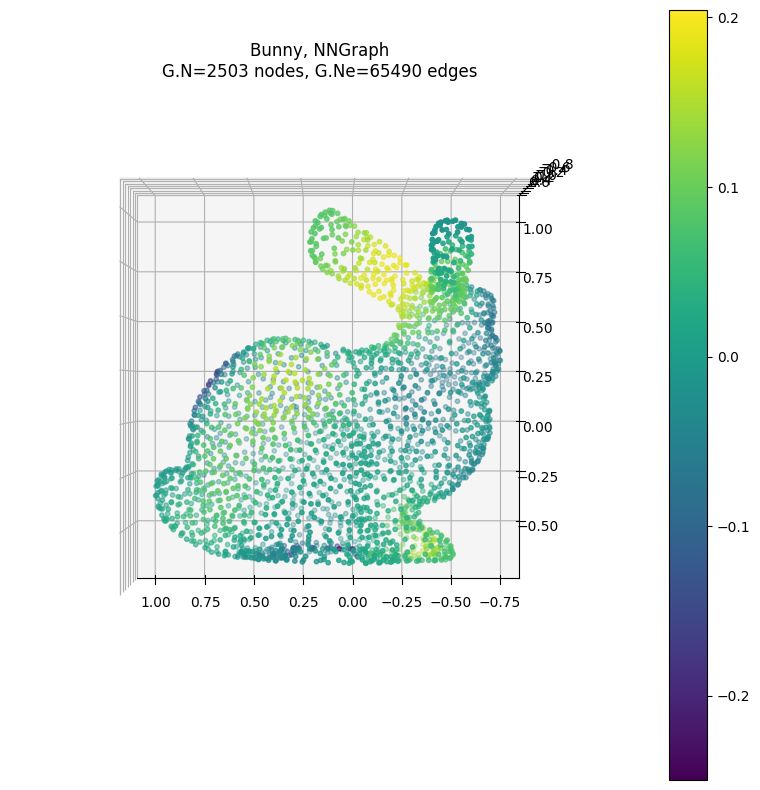

In [21]:
# TODO: (a) PLOT THE FOURIER TRANSFORM OF h_low HERE, AS WELL AS (b) THE FILTER h_low ON THE BUNNY GRAPH


'''
PART (a)
'''

evals = G.e
lambda_n = evals[-1]
#filter function h_low^hat

def h_low_hat(m):
  h_low = (1 - evals / lambda_n)**m
  return h_low

h_low = h_low_hat(10)
# plot h^low vs eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(evals, h_low) #x = evals, and y = h_low^hat
'''
PART (b)
'''
# matmul eigenvectors with filter function from a)
h_low_vertices = np.matmul(G.U, h_low)
#plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
G.plot_signal(h_low_vertices, ax=ax)
plt.show()


While plotting $h_{\mathrm{low}}$ plots the filter on the vertices of the graph, it can be a pretty bad way to understand how $h_{\mathrm{low}}$ will work when used to filter a graph signal $x$ via the graph convolution $x \ast h_{\mathrm{low}}$. To understand this better, we can localize the filter $h_{\mathrm{low}}$ at a vertex $b \in V$ by computing the graph translation, $(h_{\mathrm{low}})_b$. See the class notes on graph translations for more details on why this is a good way to understand how $h_{\mathrm{low}}$ will act as a graph convolution filter. Now let us try it out in practice.

**Task 4: Create three versions of the filter $h_{\mathrm{low}}$ using $m = 5, 10, 20$ in the definition of $\hat{h}_{\mathrm{low}}$. For each $m$, plot $(h_{\mathrm{low}})_b$ on the bunny manifold using `G.plot_signal`; do this for (a) $b = 1000$ (should be a vertex near the tail) and (b) $b = 1400$ (should be a vertex on the front ear). Note I am using the Python indexing convention, so $V = \{0, \ldots, n-1\}$ (in other words, $b=1000$ and $b=1400$ are the Python indices that you should use, you do not need to adjust them by $-1$).**

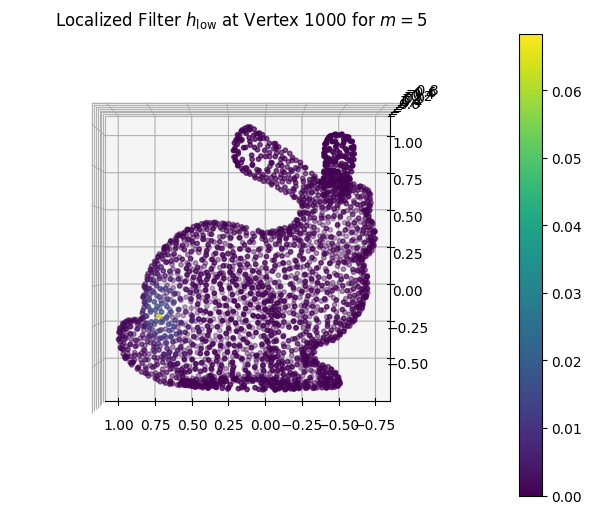

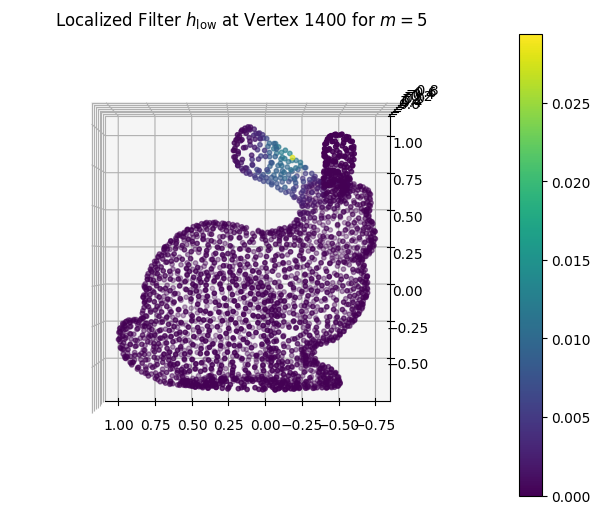

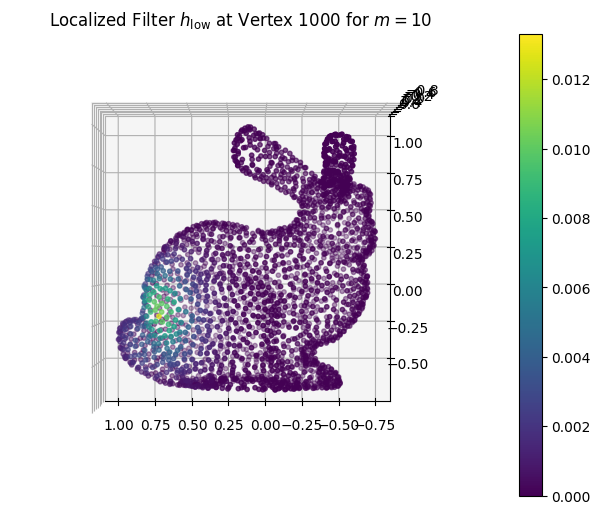

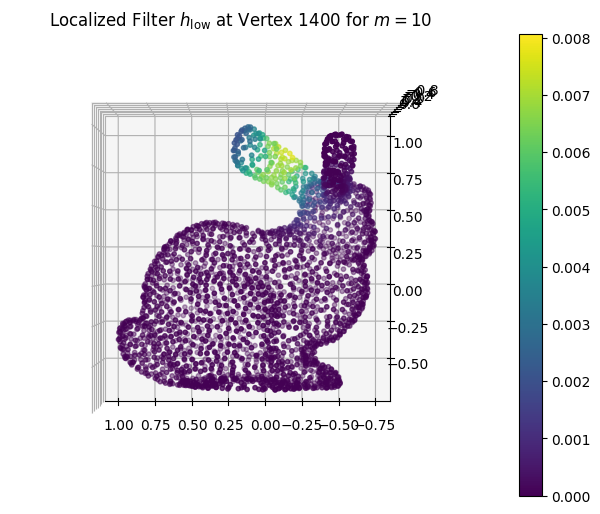

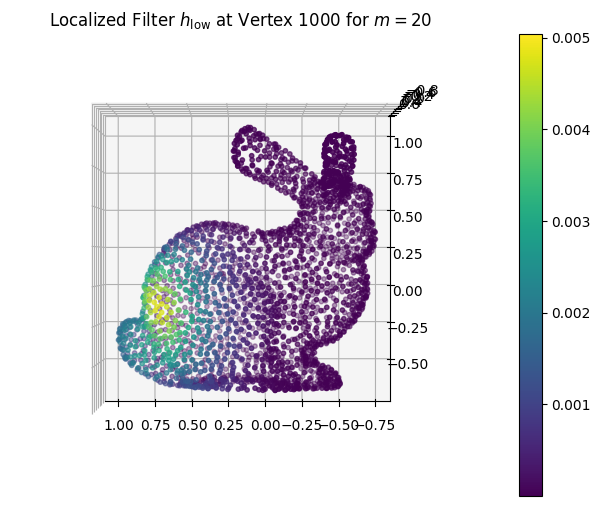

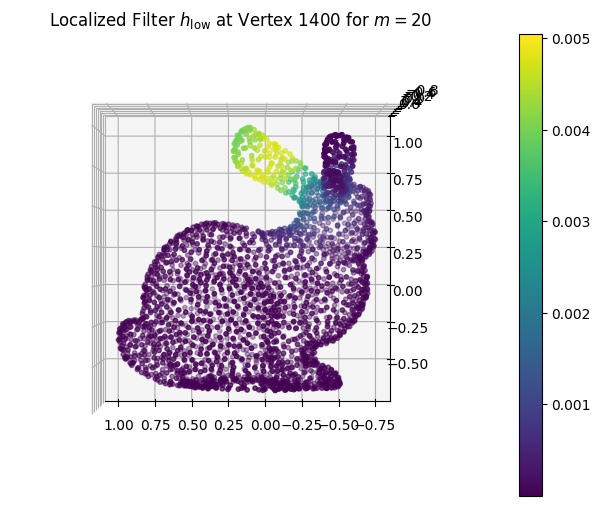

In [25]:
# TODO: PLOT THE GRAPH TRANSLATIONS OF THE FILTER h_low HERE

'''
translation is = EigenvectorsMatrix (h_low (EigenvectorsMatrix^T * delta_b)) where delta_b is vector = 1 at index b and 0 otherwise
'''

evals = G.e
m_list = [5, 10, 20]
vertices = [1000, 1400]
lambda_n = evals[-1]

# delta_b is vector = 1 at index b, 0 otherwise
def delta_b_value(N, b):
  delta = np.zeros(N)
  delta[b] = 1
  return delta

# translation = evectorsMatrix (h_low_hat (evectorsMatrix^T * delta_b))
def graph_translation_h_low_b(G, h_low_hat, b):
  delta_b = delta_b_value(G.N, b)
  h_low_b =  np.matmul(G.U , (h_low_hat * np.matmul(G.U.T , delta_b)))
  return h_low_b

for m in m_list:

    h_low = h_low_hat(m)

    for b in vertices:
        delta_b = np.zeros(G.N)
        delta_b[b] = 1
        h_low_b = graph_translation_h_low_b(G, h_low, b)

        # Filter plot
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111, projection='3d')
        G.plot_signal(h_low_b, ax=ax)
        ax.set_title(f'Localized Filter $h_{{\\text{{low}}}}$ at Vertex {b} for $m={m}$')
        plt.show()



You should notice a few things about this filter from your plots:
* The larger $m$, the larger the support of the filter around the vertex $b$. This is exactly what we proved in class since $\hat{h}_{\mathrm{low}}$ is an $m$-degree polynomial of $\lambda_k$.
* The filter adapts to the local geometry of the location of the vertex to which it is translated.
* The filter is locally non-negative around the vertex $b$, meaning that $x \ast h_{\mathrm{low}} (b)$ will replace $x (b)$ with a local average of $x$ in the $m$-hop neighborhood of $b$. For those of you familiar with classical signal processing for Euclidean signals, this should remind you of how a standard low pass filter works.

Let us now use $h_{\mathrm{low}}$ to filter a graph signal. Since a low pass filter replaces $x(b)$ with a local average of $x(b)$, it is good for de-noising smooth signals. Let us suppose we are given a noisy version of $\psi_2$, and we want to try to recover $\psi_2$ from this noisy signal. Let $x$ be the noisy signal, defined as:

\begin{equation*}
x(b) = \psi_2 (b) + \varepsilon (b), \quad \varepsilon (b) \sim \mathcal{N}(0, \sigma^2) \, .
\end{equation*}

We can filter $x$ by computing $x \ast h_{\mathrm{low}}$, which implicitly computes:

\begin{equation*}
x \ast h_{\mathrm{low}} = \psi_2 \ast h_{\mathrm{low}} + \varepsilon \ast h_{\mathrm{low}} \, .
\end{equation*}

Since $\varepsilon$ has zero average, the local averaging of $x$ will reduce the noise. Furthermore, since $\psi_2$ is smooth over the bunny, a sufficiently localized filter $h_{\mathrm{low}}$ will keep $\psi_2$ approximately the same. Let us try it out now.

**Task 5: Below I create the signal $x$ for you with $\sigma = 0.02$. Filter $x$ using the $h_{\mathrm{low}}$ filter that you created previously with $m = 5$. Make three plots: (a) Plot $x$ on the bunny; (b) Plot $x \ast h_{\mathrm{low}}$ on the bunny; and (c) plot $\psi_2$ on the bunny.**

In [ ]:
# TODO: FILTER THE SIGNAL x HERE, AND MAKE THE THREE PLOTS (a, b, c) DESCRIBED IN THE CELL ABOVE

# Here is the signal x
n = np.size(G.e)
x = G.U[:,1] + np.random.normal(loc=0, scale=0.02, size=n)

In your three plots in the previous cell you should see that $x$ does not look too much like $\psi_2$, but $x \ast h_{\mathrm{low}}$ does match $\psi_2$ pretty well!

Different types of filters are good for different things though. Let us now consider a different type of signal in which we take $\psi_2$ and set all of its non-negative entries equal to $+1$, and all of its negative entries equal to $-1$:

\begin{equation*}
x(b) = \left\{
\begin{array}{ll}
+1 & \psi_2 (b) \geq 0 \\
-1 & \psi_2 (b) < 0
\end{array}
\right. \, .
\end{equation*}

This signal will cut the bunny in half and is not smooth since there is a big jump in its values across the edges for which $\psi_2$ changes sign. Our goal here is to have a filter extract the edge along which this big jump occurs. The low pass filter $h_{\mathrm{low}}$ will not be so good for this, since it computes local averages of $x$, which in turn will maintain the values of $x$ away from the edge (since they are locally constant) and will smooth the edge itself. We need a different type of filter, called a high pass filter. A high pass filter $h_{\mathrm{high}}$ has its Fourier transform supported in the high frequencies (large eigenvalues) of the graph. As such, when one computes $x \ast h_{\mathrm{high}}$, one keeps the high frequencies of $x$ and discards the low frequencies of $x$. Such filters necessaritly must oscillate over the graph, that is they must take positive and negative values. If they are also sufficiently localized and satisfy $\hat{h}_{\mathrm{high}}(1) = 0$, they will act as an edge detector. A simple way to create such a filter is to take the "complement" of $\hat{h}_{\mathrm{low}}$ when defining $\hat{h}_{\mathrm{high}}$:

\begin{equation*}
\hat{h}_{\mathrm{high}}(k) = 1 - \hat{h}_{\mathrm{low}}(k) = 1 - \left(1 - \frac{\lambda_k}{\lambda_n} \right)^m \, .
\end{equation*}

This filter will have its support in the high frequencies, it will be localized in proportion to $m$, and one can see it satisfies $\hat{h}_{\mathrm{high}} (1) = 0$.

**Task 6: Below I created the signal $x$ for you. Using $m=5$, create the Fourier transform of the high pass filter, $\hat{h}_{\mathrm{high}}$, and make a single plot with both $\hat{h}_{\mathrm{low}}(k)$ (for $m=5$) and $\hat{h}_{\mathrm{high}}(k)$ as a function of $\lambda_k$ (not the index $k$). Then filter the signal $x$ with both $h_{\mathrm{low}}$ and $h_{\mathrm{high}}$, that is, compute $x \ast h_{\mathrm{low}}$ and $x \ast h_{\mathrm{high}}$. Make three additional plots: (a) the signal $x$ on the bunny; (b) $x \ast h_{\mathrm{low}}$ on the bunny; and (c) $x \ast h_{\mathrm{high}}$ on the bunny.**

In [ ]:
# TODO: FILTER THE SIGNAL x HERE AND MAKE THE REQUESTED PLOTS

# Here is the signal x
x = (G.U[:,1] >= 0).astype(float) - (G.U[:,1] < 0).astype(float)

If all went well, you should see that the signal $x$ "cuts" the bunny in half. You should also see that $x \ast h_{\mathrm{low}}$ takes the same values as $x$ for vertices away from the edge, and smooths $x$ in the vicinity of the edge. On the other hand, you should also see that $x \ast h_{\mathrm{high}}$ is zero on the vertices away from the edge, and responds strongly in a localized neighborhood of the edge, thus doing a good job of detecting the edge.

Okay, that is all! Please turn in this notebook along with your written exercises.